In [151]:
import re    
import nltk
nltk.download('stopwords')
import string 
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore")

import glob
import re
import pickle
import numpy as np
import pandas as pd
import os
import tensorflow as tf
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# from sentiment import tokenize_stem
# from sentiment_module import tokenize_stem
# nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer ,TfidfTransformer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
#Deep
import tensorflow as tf
from keras.models import Sequential,load_model
from keras.layers import Dense, Embedding
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation, Lambda,Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Input,GlobalMaxPooling1D
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [152]:
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
path='dataset'
all_file=glob.glob(os.path.join(path+"/*.csv") )
li=[]
for filename in all_file:
    df=pd.read_csv(filename,index_col=None,header=None,encoding='latin-1',names=DATASET_COLUMNS)
    li.append(df)
df=pd.concat(li,axis=0,ignore_index=True)

In [153]:
df

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
...,...,...,...,...,...,...
1600001,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever
1600002,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1600003,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details
1600004,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur


In [154]:
df.drop(['ids','date','flag','user'],axis = 1,inplace = True)
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [155]:
df.sentiment=df.sentiment.replace(4,1)

In [156]:
df["sentiment"].value_counts()

0    800006
1    800000
Name: sentiment, dtype: int64

In [157]:
positif_df = df[df.sentiment==1].iloc[:16000,:]
print(positif_df.shape)
negative_df = df[df.sentiment==0].iloc[:13000,:]
print(negative_df.shape)

(16000, 2)
(13000, 2)


In [158]:
df = pd.concat([positif_df,negative_df],axis = 0)
print(df.shape)
df.head()

(29000, 2)


,sentiment,text
800003,1,I LOVE @Health4UandPets u guys r the best!!
800004,1,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!
800005,1,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart."
800006,1,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup"
800007,1,@LovesBrooklyn2 he has that effect on everyone


In [159]:
df['Clean_TweetText'] = df['text'].str.replace("@", "") 
df.head()

,sentiment,text,Clean_TweetText
800003,1,I LOVE @Health4UandPets u guys r the best!!,I LOVE Health4UandPets u guys r the best!!
800004,1,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!
800005,1,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.","DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart."
800006,1,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup","Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup"
800007,1,@LovesBrooklyn2 he has that effect on everyone,LovesBrooklyn2 he has that effect on everyone


In [160]:
df['Clean_TweetText'] = df['Clean_TweetText'].str.replace(r"http\S+", "") 
df.head()

,sentiment,text,Clean_TweetText
800003,1,I LOVE @Health4UandPets u guys r the best!!,I LOVE Health4UandPets u guys r the best!!
800004,1,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!
800005,1,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.","DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart."
800006,1,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup","Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup"
800007,1,@LovesBrooklyn2 he has that effect on everyone,LovesBrooklyn2 he has that effect on everyone


In [161]:
df['Clean_TweetText'] = df['Clean_TweetText'].str.replace("[^a-zA-Z]", " ") 
df.head()

,sentiment,text,Clean_TweetText
800003,1,I LOVE @Health4UandPets u guys r the best!!,I LOVE Health UandPets u guys r the best
800004,1,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meeting up with one of my besties tonight Cant wait GIRL TALK
800005,1,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",DaRealSunisaKim Thanks for the Twitter add Sunisa I got to meet you once at a HIN show here in the DC area and you were a sweetheart
800006,1,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",Being sick can be really cheap when it hurts too much to eat real food Plus your friends make you soup
800007,1,@LovesBrooklyn2 he has that effect on everyone,LovesBrooklyn he has that effect on everyone


In [162]:
stopwords=nltk.corpus.stopwords.words('english')

In [163]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [164]:
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))
df.head()

,sentiment,text,Clean_TweetText
800003,1,I LOVE @Health4UandPets u guys r the best!!,love health uandpets u guys r best
800004,1,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meeting one besties tonight cant wait girl talk
800005,1,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",darealsunisakim thanks twitter add sunisa got meet hin show dc area sweetheart
800006,1,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",sick really cheap hurts much eat real food plus friends make soup
800007,1,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyone


In [165]:
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: x.split())
df.head()

,sentiment,text,Clean_TweetText
800003,1,I LOVE @Health4UandPets u guys r the best!!,"[love, health, uandpets, u, guys, r, best]"
800004,1,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,"[im, meeting, one, besties, tonight, cant, wait, girl, talk]"
800005,1,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.","[darealsunisakim, thanks, twitter, add, sunisa, got, meet, hin, show, dc, area, sweetheart]"
800006,1,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup","[sick, really, cheap, hurts, much, eat, real, food, plus, friends, make, soup]"
800007,1,@LovesBrooklyn2 he has that effect on everyone,"[lovesbrooklyn, effect, everyone]"


In [166]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: [stemmer.stem(i) for i in x])
df.head()

,sentiment,text,Clean_TweetText
800003,1,I LOVE @Health4UandPets u guys r the best!!,"[love, health, uandpet, u, guy, r, best]"
800004,1,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,"[im, meet, one, besti, tonight, cant, wait, girl, talk]"
800005,1,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.","[darealsunisakim, thank, twitter, add, sunisa, got, meet, hin, show, dc, area, sweetheart]"
800006,1,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup","[sick, realli, cheap, hurt, much, eat, real, food, plu, friend, make, soup]"
800007,1,@LovesBrooklyn2 he has that effect on everyone,"[lovesbrooklyn, effect, everyon]"


In [167]:
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
df.head()

,sentiment,text,Clean_TweetText
800003,1,I LOVE @Health4UandPets u guys r the best!!,love health uandpet u guy r best
800004,1,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,im meet one besti tonight cant wait girl talk
800005,1,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",darealsunisakim thank twitter add sunisa got meet hin show dc area sweetheart
800006,1,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",sick realli cheap hurt much eat real food plu friend make soup
800007,1,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyon


In [168]:
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,sentiment,text,Clean_TweetText
800003,1,I LOVE @Health4UandPets u guys r the best!!,love health uandpet best
800004,1,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!,meet besti tonight cant wait girl talk
800005,1,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.",darealsunisakim thank twitter sunisa meet show area sweetheart
800006,1,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup",sick realli cheap hurt much real food friend make soup
800007,1,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyon


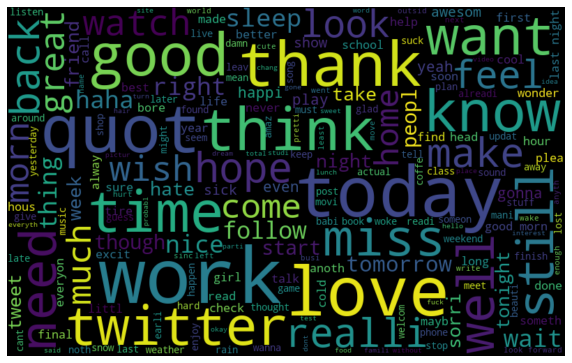

In [169]:
all_words = ' '.join([text for text in df['Clean_TweetText']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

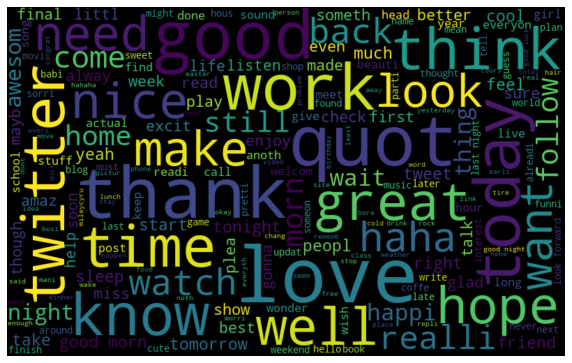

In [170]:
positive_words =' '.join([text for text in df['Clean_TweetText'][df['sentiment'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

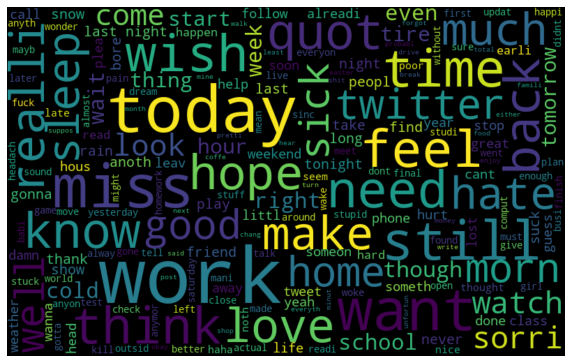

In [171]:
depressive_words =' '.join([text for text in df['Clean_TweetText'][df['sentiment'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(depressive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [172]:
df['Clean_TweetText'].shape

(29000,)

In [173]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [174]:
def preprocess(textdata):
    processedText = []
    wordLemm = WordNetLemmatizer()
    
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        tweet = re.sub(urlPattern,' URL',tweet)
        
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        tweet = re.sub(userPattern,' USER', tweet)        
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet= re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # STEP 7 :Checking if the word is a stopword.
            #if word not in stopwordlist:
            # for i in range(len(stopwordlist)):
            #     print(stopwordlist[i])
            #STEP 8 :
            if len(word)>1:
                # STEP 9 :Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
        processedText.append(tweetwords)
    return processedText

In [175]:
data_train = preprocess(df['Clean_TweetText'])

In [176]:
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from keras_preprocessing.sequence import pad_sequences

max_words = 100000
max_length = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data_train)

data_train = tokenizer.texts_to_sequences(data_train)
data_train = pad_sequences(data_train, maxlen=max_length)

In [177]:
X_train,X_test,y_train,y_test = train_test_split(data_train,df['sentiment'], test_size = 0.2, random_state = 128)

In [178]:
y_train = np.asarray(y_train).astype('int64').reshape((-1,1))
y_test = np.asarray(y_test).astype('int64').reshape((-1,1))

In [179]:
model = Sequential()
model.add(Embedding(max_words, 32, input_length=max_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [180]:
model.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
182/182 [==============================] - 12s 63ms/step - loss: 0.6200 - accuracy: 0.6477
Epoch 2/10
182/182 [==============================] - 11s 61ms/step - loss: 0.4509 - accuracy: 0.7934
Epoch 3/10
182/182 [==============================] - 12s 65ms/step - loss: 0.2997 - accuracy: 0.8797
Epoch 4/10
182/182 [==============================] - 11s 60ms/step - loss: 0.1738 - accuracy: 0.9375
Epoch 5/10
182/182 [==============================] - 14s 76ms/step - loss: 0.1091 - accuracy: 0.9622
Epoch 6/10
182/182 [==============================] - 12s 67ms/step - loss: 0.0770 - accuracy: 0.9735
Epoch 7/10
182/182 [==============================] - 11s 63ms/step - loss: 0.0628 - accuracy: 0.9788
Epoch 8/10
182/182 [==============================] - 12s 64ms/step - loss: 0.0526 - accuracy: 0.9819
Epoch 9/10
182/182 [==============================] - 12s 64ms/step - loss: 0.0469 - accuracy: 0.9835
Epoch 10/10
182/182 [==============================] - 12s 66ms/step - loss: 0.044

In [181]:
from sklearn.metrics import accuracy_score

predict = model.predict(X_test)

_predict = []
for item in [x[0] for x in predict]:
    if(item<=0.1):
        _predict.append(0)
    else:
        _predict.append(1)
        
accuracy_score(y_test,np.array(_predict).reshape(-1,1))

182/182 [==============================] - 1s 3ms/step


0.6775862068965517

In [182]:
def predict( model, text):
    
    sentiment = model.predict(text)
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [183]:
X_test

array([[    0,     0,     0, ...,  4404,   551,    12],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,  1776,   179,   736],
       ...,
       [    0,     0,     0, ...,   123,   181,   164],
       [    0,     0,     0, ..., 16029, 16030,  2585],
       [    0,     0,     0, ...,  3083,   451,    69]])

In [184]:
text = ["Fuck Fuck",
            "I am very happy today",
            "I'm feeling very sleepy",
            "I'm so glad I have a friend now",
            "I feel very sad sad today",
            "Happy"]

text = tokenizer.texts_to_sequences(text)
model.predict(pad_sequences(text, maxlen=max_length))

1/1 [==============================] - 0s 28ms/step


array([[0.06313618],
       [0.28666282],
       [0.36596268],
       [0.93089086],
       [0.0429657 ],
       [0.36596268]], dtype=float32)

In [185]:
model_CNN = Sequential()
model_CNN.add(Embedding(max_words, 32, input_length=max_length))
model_CNN.add(Conv1D(32, 1, activation='relu'))
model_CNN.add(MaxPooling1D())
model_CNN.add(Conv1D(32, 1, activation='relu'))
model_CNN.add(GlobalMaxPooling1D())
model_CNN.add(Dense(1, activation='sigmoid'))
model_CNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [186]:
model_CNN.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
182/182 [==============================] - 12s 63ms/step - loss: 0.6342 - accuracy: 0.6297
Epoch 2/10
182/182 [==============================] - 12s 64ms/step - loss: 0.4796 - accuracy: 0.7744
Epoch 3/10
182/182 [==============================] - 12s 67ms/step - loss: 0.3472 - accuracy: 0.8523
Epoch 4/10
182/182 [==============================] - 13s 70ms/step - loss: 0.2498 - accuracy: 0.8997
Epoch 5/10
182/182 [==============================] - 10s 55ms/step - loss: 0.1882 - accuracy: 0.9276
Epoch 6/10
182/182 [==============================] - 13s 70ms/step - loss: 0.1504 - accuracy: 0.9432
Epoch 7/10
182/182 [==============================] - 14s 79ms/step - loss: 0.1283 - accuracy: 0.9520
Epoch 8/10
182/182 [==============================] - 14s 77ms/step - loss: 0.1131 - accuracy: 0.9577
Epoch 9/10
182/182 [==============================] - 12s 66ms/step - loss: 0.0998 - accuracy: 0.9616
Epoch 10/10
182/182 [==============================] - 13s 69ms/step - loss: 0.091

In [187]:
text = ["Fuck fuck",
            "I am very happy today",
            "I'm feeling very sleepy",
            "I'm so glad I have a friend now",
            "I feel very sad sad today",
            "Happy"]

text = tokenizer.texts_to_sequences(text)
model_CNN.predict(pad_sequences(text, maxlen=max_length))

1/1 [==============================] - 0s 114ms/step


array([[0.01421568],
       [0.38747662],
       [0.4733217 ],
       [0.5333531 ],
       [0.12973012],
       [0.4733217 ]], dtype=float32)

In [188]:
from sklearn.metrics import accuracy_score

predict = model_CNN.predict(X_test)

_predict = []
for item in [x[0] for x in predict]:
    if(item<=0.1):
        _predict.append(0)
    else:
        _predict.append(1)
        
accuracy_score(y_test,np.array(_predict).reshape(-1,1))

182/182 [==============================] - 0s 2ms/step


0.6741379310344827

In [189]:
filename = 'model/tokenizer_string.pickle'

#Save model
pickle.dump(tokenizer, open(filename, 'wb'))
model.save("model/Sentiment_ANN.h5")
model_CNN.save("model/Sentiment_CNN.h5")